<a href="https://colab.research.google.com/github/Mahtab-Hossain/Research/blob/main/rldd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import os
import pathlib
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model, callbacks
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Convolution2D,Activation,Flatten,Dense,Dropout,MaxPool2D,BatchNormalization

In [49]:
data = '/content/drive/MyDrive/rice_leaf_diseases'

In [50]:
classes=[]
for file in os.listdir(data):
    classes+=[file]
print(classes)
print(len(classes))

['Leaf smut', 'Brown spot', 'Bacterial leaf blight', 'Healthy']
4


In [51]:
brownspot = [data + '/Brown spot/' + img for img in os.listdir(data + '/Brown spot')[:9]]
leafblight = [data  + '/Bacterial leaf blight/' + img for img in os.listdir(data + '/Bacterial leaf blight')[:9]]
leafsmut = [data  + '/Leaf smut/' + img for img in os.listdir(data + '/Leaf smut')[:9]]
healthy = [data  + '/Healthy/' + img for img in os.listdir(data + '/Healthy')[:9]]

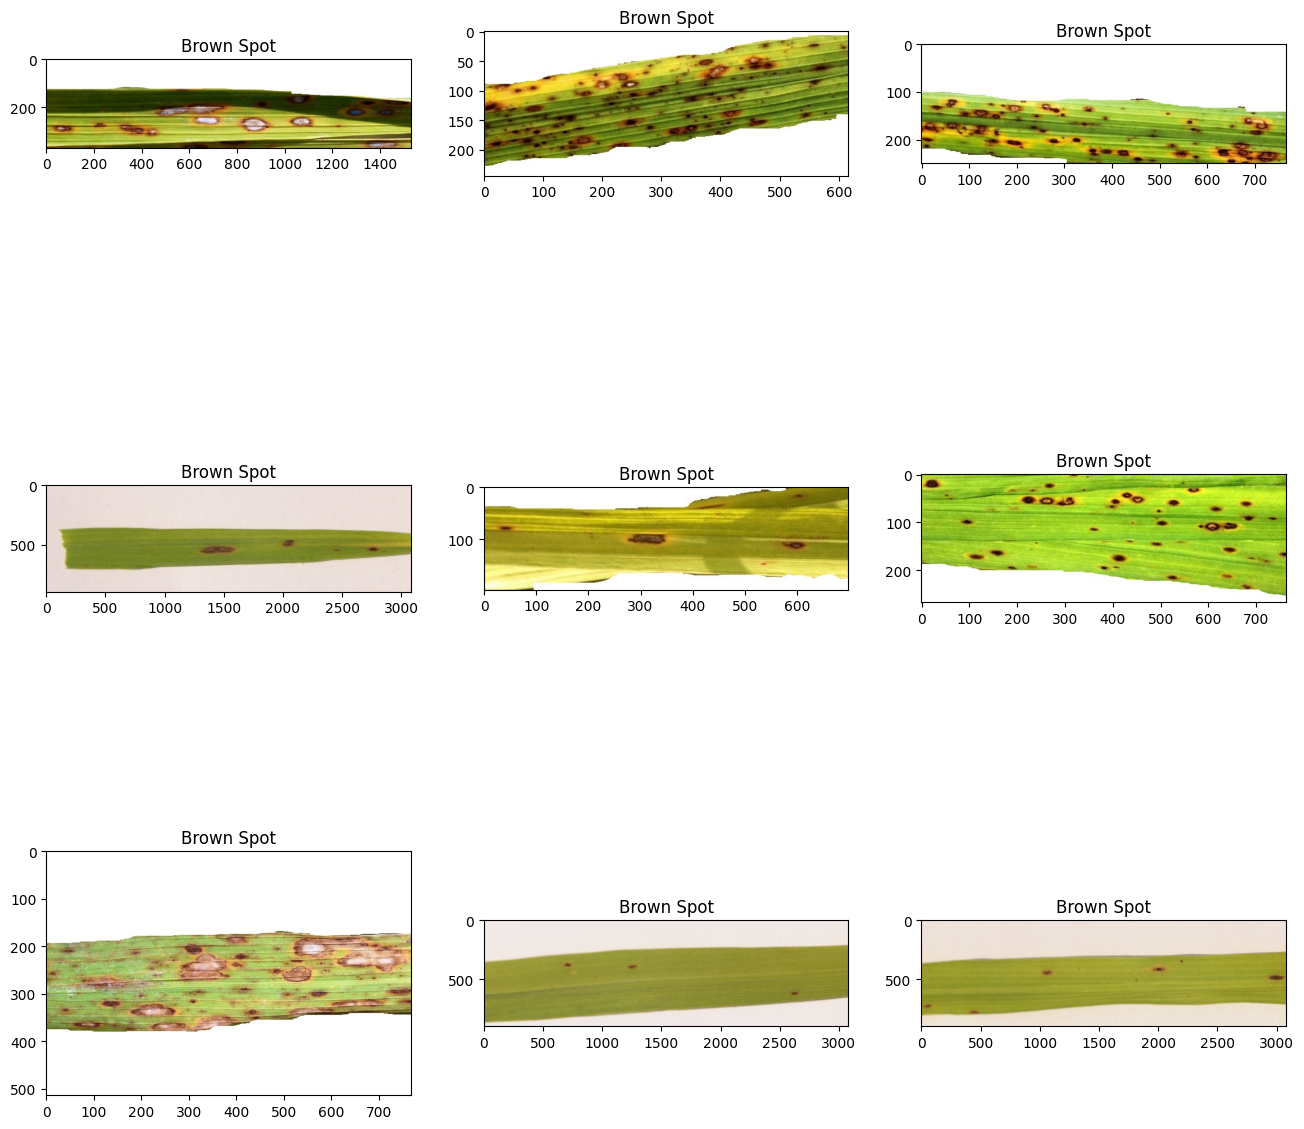

In [52]:
from PIL import Image
plt.figure(figsize=(16,16))
for i,k  in enumerate(brownspot):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Brown Spot")

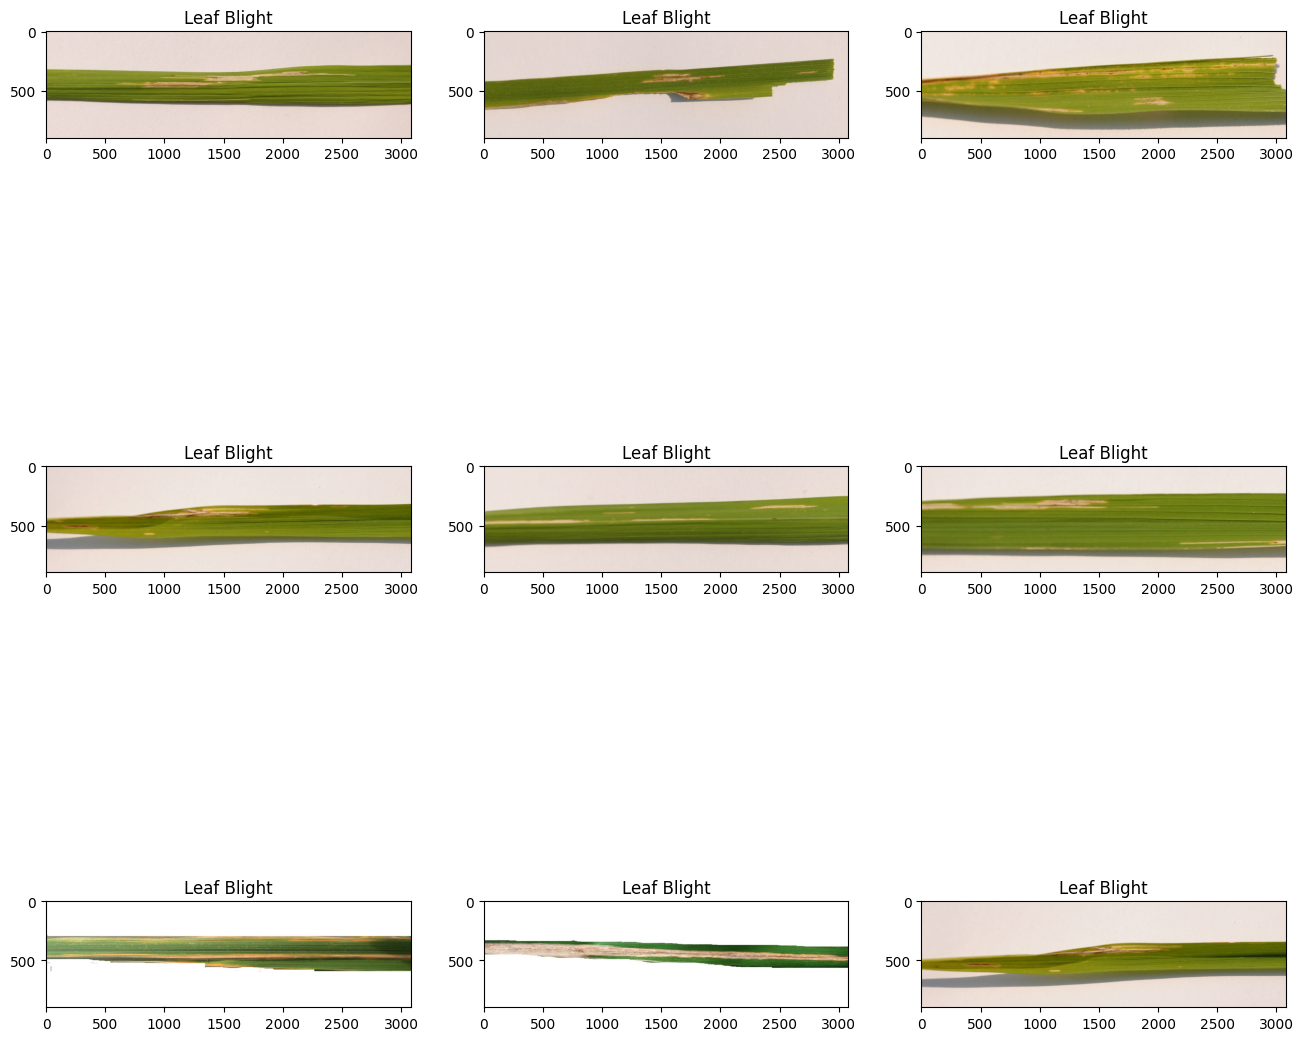

In [53]:
plt.figure(figsize=(16,16))
for i,k  in enumerate(leafblight):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Leaf Blight")

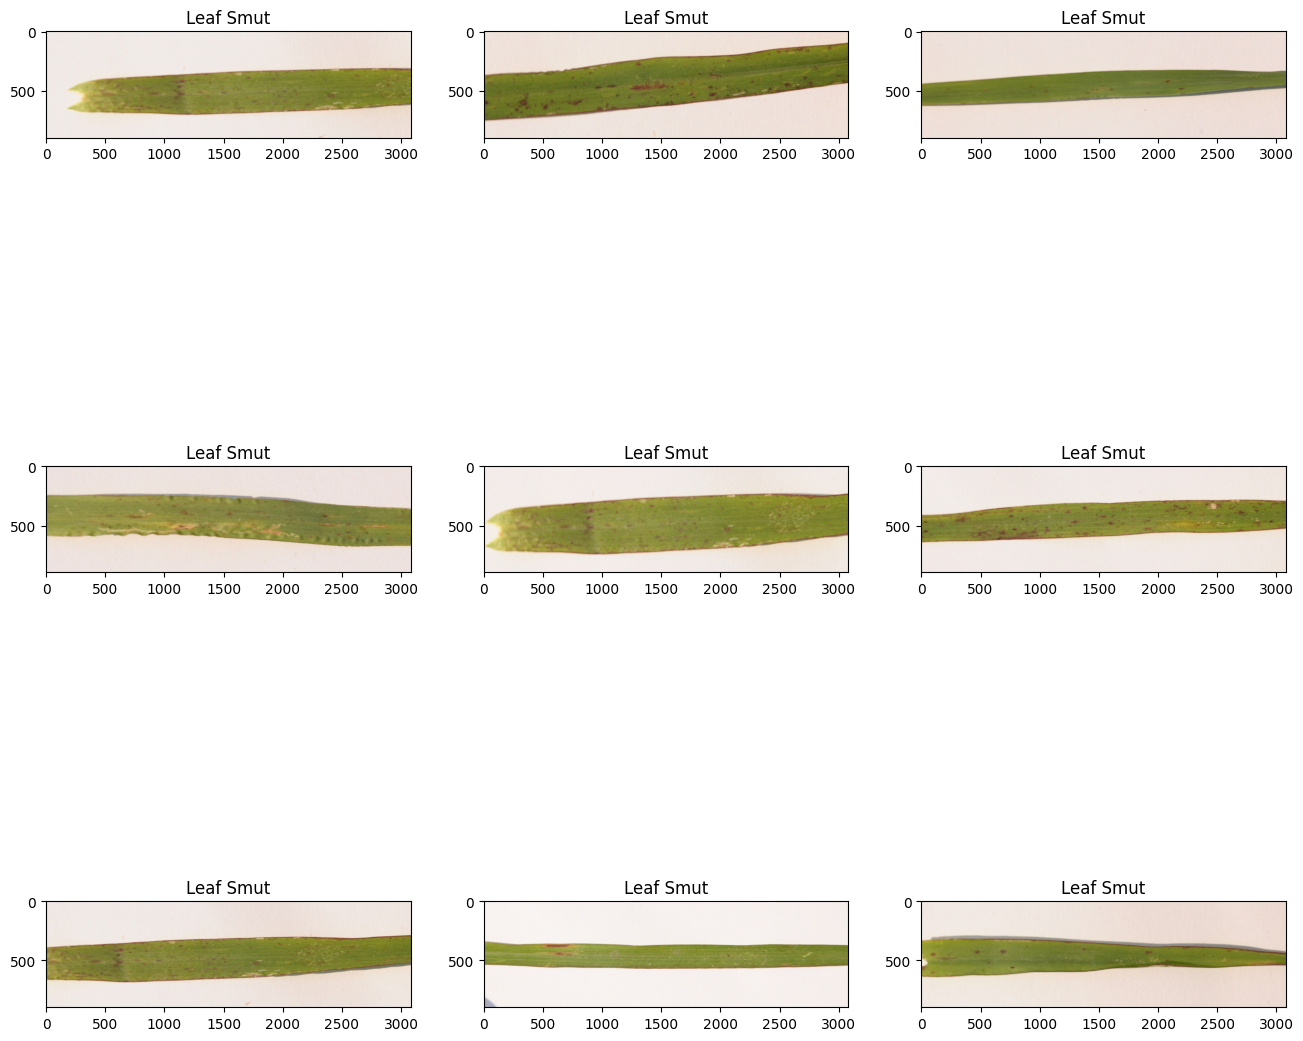

In [54]:
plt.figure(figsize=(16,16))
for i,k  in enumerate(leafsmut):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Leaf Smut")

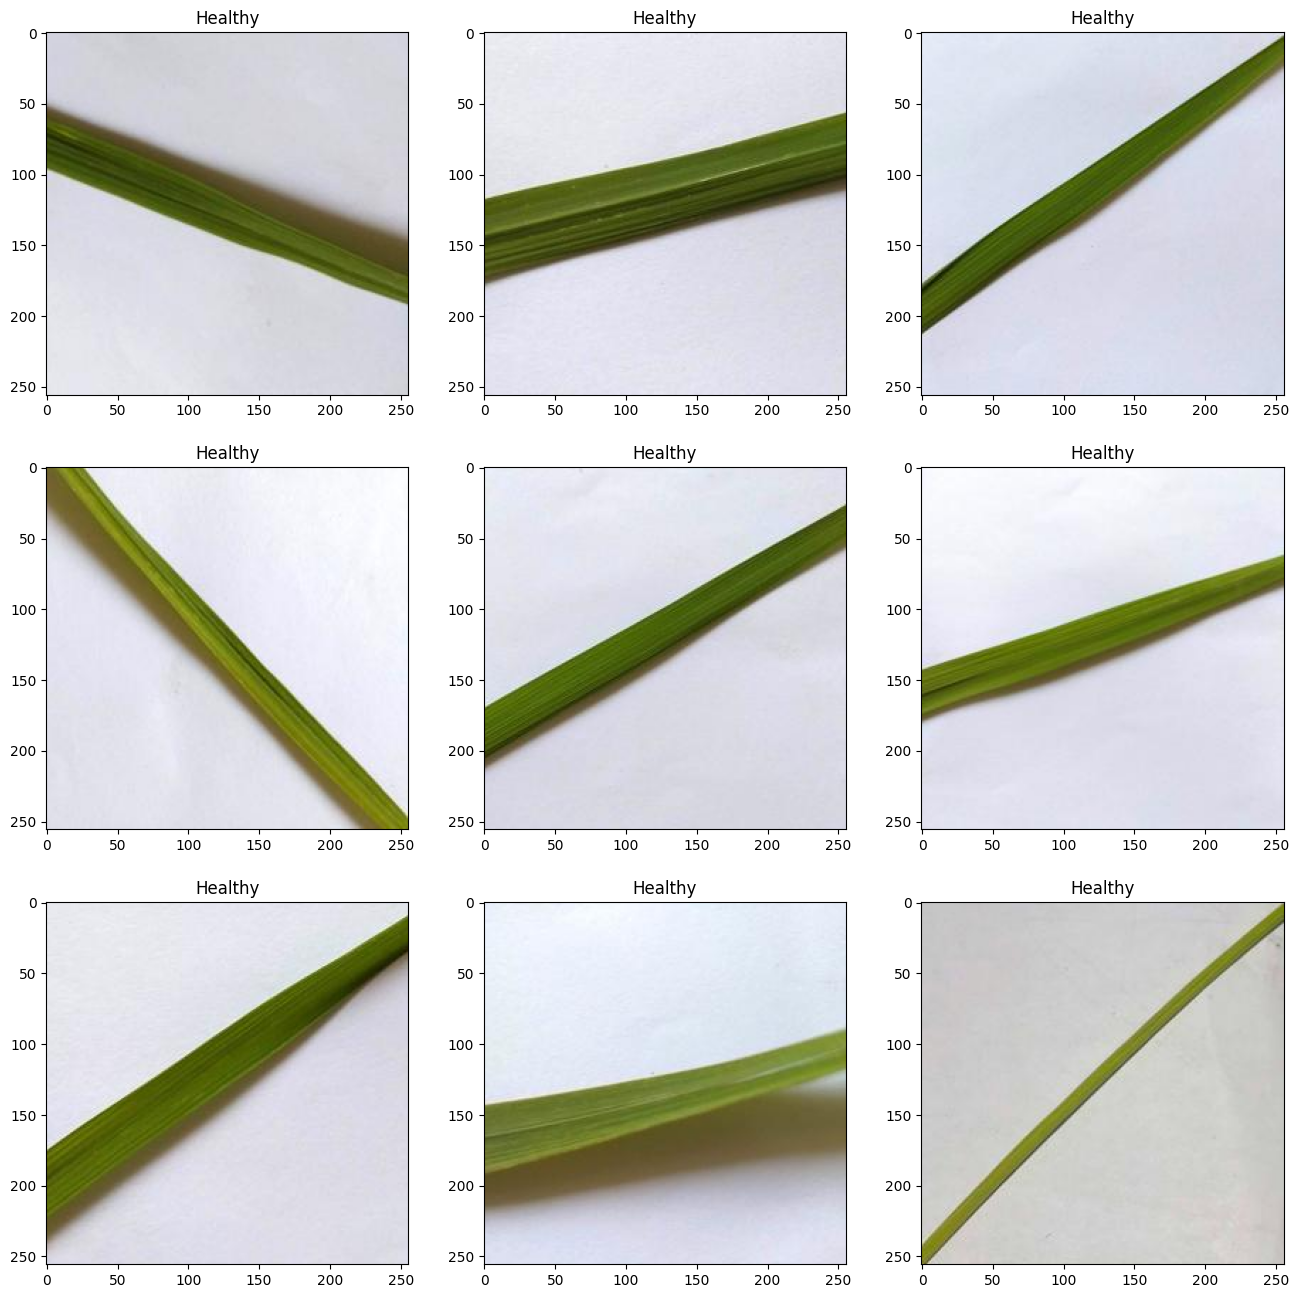

In [55]:
plt.figure(figsize=(16,16))
for i,k  in enumerate(healthy):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Healthy")

In [56]:
dataGenerator = ImageDataGenerator(rescale= 1. / 255, validation_split=0.2)
train_data = dataGenerator.flow_from_directory(
    data,
    target_size=(224,224),
    batch_size=64,
    class_mode='categorical',
    shuffle=True,
    subset = 'training'
)
val_data = dataGenerator.flow_from_directory(
    data,
    target_size=(224,224),
    batch_size=64,
    class_mode='categorical',
    shuffle=True,
    subset = 'validation'
)

Found 161 images belonging to 4 classes.
Found 40 images belonging to 4 classes.


In [57]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3), padding='same', input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(3, 3)))
model.add(Conv2D(128, kernel_size=(3,3), padding='same', input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(3, 3)))
model.add(Conv2D(256, kernel_size=(3,3), padding='same', input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(3, 3)))
model.add(Conv2D(512, kernel_size=(3,3), padding='same', input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(3, 3)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization_16 (Bat  (None, 224, 224, 64)     256       
 chNormalization)                                                
                                                                 
 activation_16 (Activation)  (None, 224, 224, 64)      0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 74, 74, 128)       73856     
                                                                 
 batch_normalization_17 (Bat  (None, 74, 74, 128)     

In [58]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [59]:
history = model.fit(train_data,validation_data=val_data,epochs=20)

Epoch 1/20
3/3 [==============================] - 53s 14s/step - loss: 2.0018 - accuracy: 0.4161 - val_loss: 1.3381 - val_accuracy: 0.4000
Epoch 2/20
3/3 [==============================] - 42s 17s/step - loss: 1.0113 - accuracy: 0.6149 - val_loss: 1.3288 - val_accuracy: 0.4000
Epoch 3/20
3/3 [==============================] - 42s 17s/step - loss: 0.6541 - accuracy: 0.7205 - val_loss: 1.2703 - val_accuracy: 0.4000
Epoch 4/20
3/3 [==============================] - 42s 17s/step - loss: 0.5259 - accuracy: 0.7329 - val_loss: 1.2200 - val_accuracy: 0.4000
Epoch 5/20
3/3 [==============================] - 52s 23s/step - loss: 0.4328 - accuracy: 0.8261 - val_loss: 1.2198 - val_accuracy: 0.4750
Epoch 6/20
3/3 [==============================] - 42s 13s/step - loss: 0.4058 - accuracy: 0.8634 - val_loss: 1.2126 - val_accuracy: 0.5250
Epoch 7/20
3/3 [==============================] - 46s 14s/step - loss: 0.3759 - accuracy: 0.8385 - val_loss: 1.1932 - val_accuracy: 0.4000
Epoch 8/20
3/3 [===========

In [60]:
def plot_training_curves(history_df):
    plt.figure(figsize = (13, 4), dpi = 120)
    ax = plt.subplot(1, 2, 1)
    plt.plot(range(1, len(history_df) + 1), history_df['loss'], marker = '.', label = 'Training Loss')
    plt.plot(range(1, len(history_df) + 1), history_df['val_loss'], marker = '^', label = 'Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Cross Entropy')
    plt.grid()
    plt.legend()
    ax = plt.subplot(1, 2, 2)
    plt.plot(range(1, len(history_df) + 1), history_df['accuracy'], marker = '.', label = 'Training Accuracy')
    plt.plot(range(1, len(history_df) + 1), history_df['val_accuracy'], marker = '^', label = 'Validation Accurcay')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend()
    plt.show()

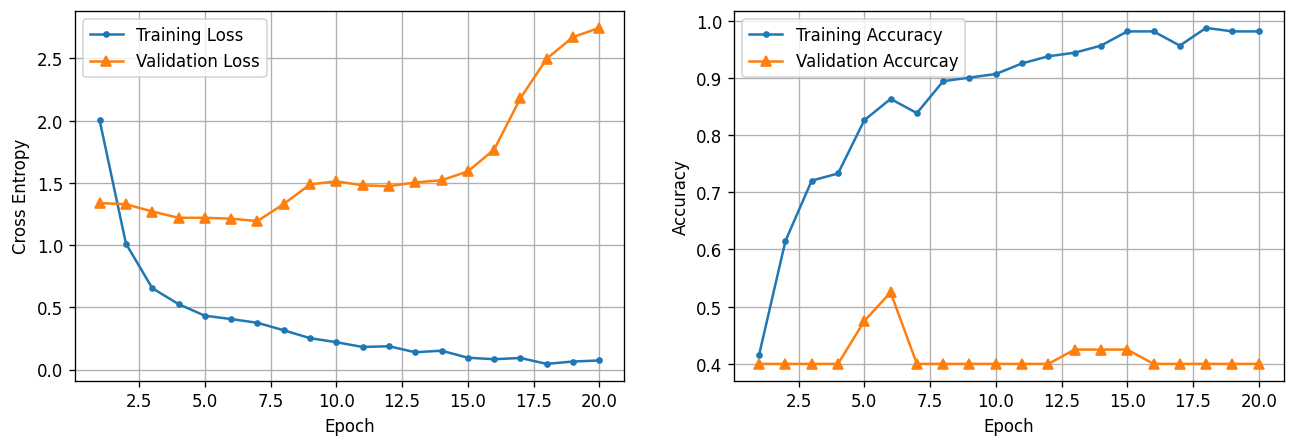

In [61]:
plot_training_curves(pd.DataFrame(history.history))